In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima import auto_arima

# Step 2: Fetch Data from Yahoo Finance
def fetchData():
    # Fetch data
    data = yf.download('AAPL','2010-01-01','2022-05-30')

    # We will use 'Close' prices for our analysis
    df = data['Close']

    # Step 3: Preprocess the Data

    # Check for NaN values and remove them
    if df.isnull().sum() > 0:
        df = df.dropna()

    # Check for duplicate indices and remove them
    df = df.loc[~df.index.duplicated(keep='first')]

    # Resample data to have one data point for each day
    df = df.resample('D').ffill()
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Close Prices')
    plt.plot(df)
    plt.title('Apple Inc. closing price')
    plt.show()
    return df


[*********************100%***********************]  1 of 1 completed


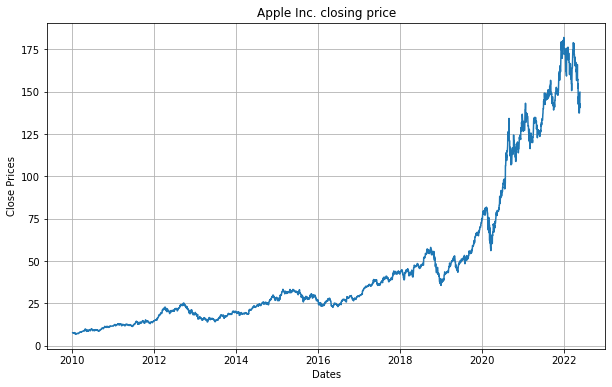

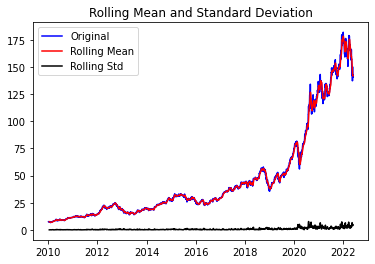

Results of Dickey-Fuller Test:
Test Statistic                    0.915466
p-value                           0.993289
#Lags Used                       31.000000
Number of Observations Used    4495.000000
Critical Value (1%)              -3.431806
Critical Value (5%)              -2.862183
Critical Value (10%)             -2.567112
dtype: float64


In [2]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(fetchData())


[*********************100%***********************]  1 of 1 completed


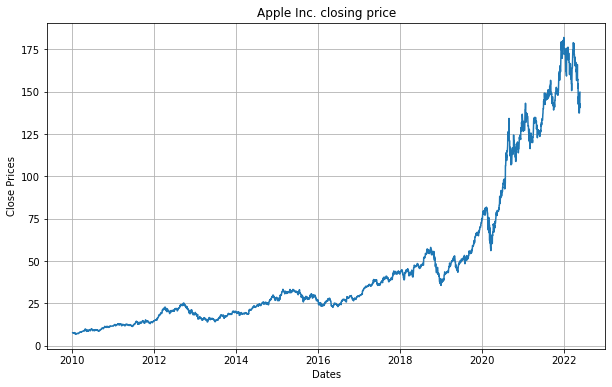

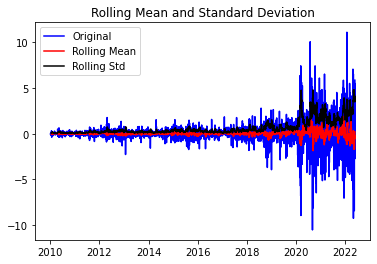

Results of Dickey-Fuller Test:
Test Statistic                -1.214802e+01
p-value                        1.594052e-22
#Lags Used                     3.000000e+01
Number of Observations Used    4.495000e+03
Critical Value (1%)           -3.431806e+00
Critical Value (5%)           -2.862183e+00
Critical Value (10%)          -2.567112e+00
dtype: float64


In [3]:
#the previous statistics indicate that the data is non-stationary.
df=fetchData()
df_diff = df.diff().dropna()
test_stationarity(df_diff)


[*********************100%***********************]  1 of 1 completed


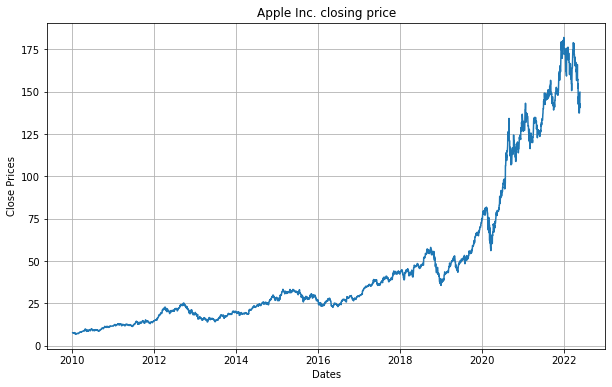

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13141.215, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13164.746, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13143.359, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13141.760, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13166.898, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13141.419, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13141.774, Time=1.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13140.153, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13141.496, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13143.488, Time=2.74 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13143.276, Time=0.26 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 7.513 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4527
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -6566.077
Date:                Thu, 01 Jun 2023   AIC                          13140.153
Time:                        20:32:09   BIC                          13165.824
Sample:                    01-04-2010   HQIC                         13149.196
                         - 05-27-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0312      0.014      2.258      0.024       0.004       0.058
ma.L1         -0.0741      0.006    -12.047      0.000      -0.086      -0.062
ma.L2         -0.0284      0.007     -4.040      0.000      -0.042      -0.015
sigma2         1.0657      0.006    165.973      0.000       1.053       1.078
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             98607.90
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              54.81   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
#the above values clearly show that the differenciated graph is stationary
#now applying auto arima on the modelshould show order of diff=1 (SARIMAX (x,1,x))
from pmdarima import auto_arima
df=fetchData()
model = auto_arima(df, start_p=1, start_q=1, max_p=3, max_q=3, seasonal=False, trace=True)
model.summary()


[*********************100%***********************]  1 of 1 completed


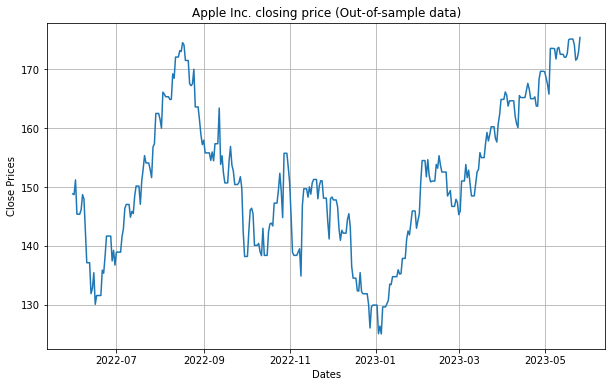

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4527
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -6566.077
Date:                Thu, 01 Jun 2023   AIC                          13140.153
Time:                        20:32:10   BIC                          13165.824
Sample:                    01-04-2010   HQIC                         13149.196
                         - 05-27-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0312      0.014      2.258      0.024       0.004       0.058
ma.L1         -0.0741      0.006    -12.047      0.000      -0.086      -0.062
ma.L2         -0.0284      0.007     -4.040      0.0

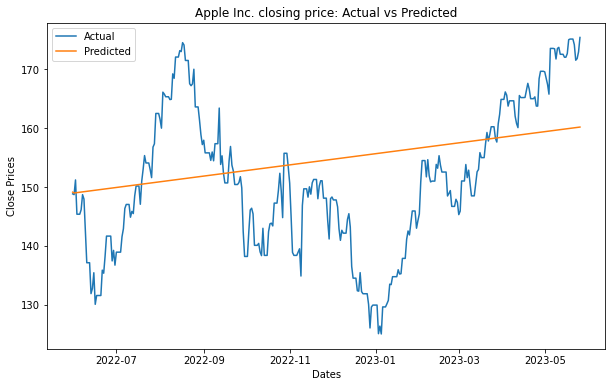

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Fetch out-of-sample data
out_sample_data = yf.download('AAPL', '2022-05-31', '2023-05-30')

# Use 'Close' prices for analysis
out_sample_df = out_sample_data['Close']

# Preprocess the data

# Check for NaN values and remove them
if out_sample_df.isnull().sum() > 0:
    out_sample_df = out_sample_df.dropna()

# Check for duplicate indices and remove them
out_sample_df = out_sample_df.loc[~out_sample_df.index.duplicated(keep='first')]

# Resample data to have one data point for each day
out_sample_df = out_sample_df.resample('D').ffill()

# Plot the out-of-sample data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(out_sample_df)
plt.title('Apple Inc. closing price (Out-of-sample data)')
plt.show()


# Fit the best model
print(model.summary())

# Predict out-of-sample values
pred = model.predict(n_periods=len(out_sample_df))

# Calculate error measures
mae = mean_absolute_error(out_sample_df, pred)
mse = mean_squared_error(out_sample_df, pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((out_sample_df - pred) / out_sample_df)) * 100

# Print error measures
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

# Plot the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(out_sample_df.index, out_sample_df, label='Actual')
plt.plot(out_sample_df.index, pred, label='Predicted')
plt.title('Apple Inc. closing price: Actual vs Predicted')
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.legend()
plt.show()


In [6]:
#Given that these are stock prices 
#(which are notoriously difficult to predict), the performance of ARIMA model seems reasonable. 
#The errors aren't exceptionally high, which suggests that the ARIMA model has captured some structure in the data.
#But, like any forecast model, it's not perfect and there's likely room for improvement.
#lets incorporate news data in the next one